##Técnicas de modelagem de ML para predição dos volumes acumulados no sistema de reservação Cantareira, de 01-01-2017 a 25-03-2023

##ETL

###Importando bibliotecas e pacotes para ETL

In [122]:
import pandas as pd

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

###Extração da base de dados

In [123]:
cantareira = pd.read_csv('https://raw.githubusercontent.com/OLIVEIRA-3/artigo2023/main/dados_artigo_full.csv')

In [124]:
cantareira.shape #total de linhas e colunas

(8485, 9)

In [125]:
cantareira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8485 non-null   int64  
 1   data          8485 non-null   object 
 2   volume        8485 non-null   float64
 3   chuva         8485 non-null   float64
 4   temp.max      8485 non-null   int64  
 5   diff          8484 non-null   float64
 6   medMov.chuva  8471 non-null   float64
 7   medMov.diff   8470 non-null   float64
 8   medMov.temp   8471 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 596.7+ KB


In [126]:
cantareira.head(5)

,Unnamed: 0,data,volume,chuva,temp.max,diff,medMov.chuva,medMov.diff,medMov.temp
0,1,2000-01-01,365.50555,30.900,32,NaN,NaN,NaN,NaN
1,2,2000-01-02,370.64646,29.100,27,5.14091,NaN,NaN,NaN
2,3,2000-01-03,377.00187,35.175,25,6.35541,NaN,NaN,NaN
3,4,2000-01-04,387.88206,18.725,24,10.88019,NaN,NaN,NaN
4,5,2000-01-05,403.00251,25.900,24,15.12045,NaN,NaN,NaN


###Tratamento

In [127]:
#renomeando a primeira coluna para 'id' e a coluna 'temp.max' para tempMax'
cantareira = cantareira.rename(columns={'Unnamed: 0': 'id', 'temp.max': 'tempMax'})

In [128]:
#para series temporais, precisamos transformar a coluna 'data' de object para datetime 
cantareira['data'] = pd.to_datetime(cantareira['data'])
print(cantareira['data'])

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
8480   2023-03-21
8481   2023-03-22
8482   2023-03-23
8483   2023-03-24
8484   2023-03-25
Name: data, Length: 8485, dtype: datetime64[ns]


####Recorte temporal dos dados -> 2017 em diante devido aos outliers que aparecerão devido à crise hídrica de 2014 a 2016

In [129]:
#selecionando registros de 01-01-2017 em diante
cantareira = cantareira[cantareira['data'].dt.year >= 2017]

In [130]:
#checando valores NaN para ver se eh preciso substituir por zero
cantareira.isnull().sum()

id              0
data            0
volume          0
chuva           0
tempMax         0
diff            0
medMov.chuva    0
medMov.diff     0
medMov.temp     0
dtype: int64

###Carregamento

In [131]:
cantareira.info() #resultado da limpeza com total de 9 colunas e 2275 registros

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 6210 to 8484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2275 non-null   int64         
 1   data          2275 non-null   datetime64[ns]
 2   volume        2275 non-null   float64       
 3   chuva         2275 non-null   float64       
 4   tempMax       2275 non-null   int64         
 5   diff          2275 non-null   float64       
 6   medMov.chuva  2275 non-null   float64       
 7   medMov.diff   2275 non-null   float64       
 8   medMov.temp   2275 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 177.7 KB


5 primeiras e 5 últimas linhas da base de dados tratada

In [132]:
cantareira.head(5)

,id,data,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
6210,6211,2017-01-01,452.9503,8.4,31,0.35351,5.056667,0.275564,31.53333
6211,6212,2017-01-02,452.5387,0.0,31,-0.41160,4.976667,0.263529,31.60000
6212,6213,2017-01-03,452.0478,0.9,31,-0.49084,4.916667,0.240679,31.73333
6213,6214,2017-01-04,451.3192,9.9,30,-0.72867,5.336667,0.159605,31.80000
6214,6215,2017-01-05,450.6237,0.0,31,-0.69550,5.123333,0.086787,31.86667


In [133]:
cantareira.tail(5)

,id,data,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
8480,8481,2023-03-21,788.1430,5.9,30,4.91407,7.366667,5.106556,28.60000
8481,8482,2023-03-22,790.2597,0.0,30,2.11669,6.853333,4.726079,28.66667
8482,8483,2023-03-23,791.5365,0.0,30,1.27676,6.306667,4.451279,28.66667
8483,8484,2023-03-24,792.5866,0.0,32,1.05013,5.300000,4.081039,28.80000
8484,8485,2023-03-25,793.7210,0.0,31,1.13444,5.140000,3.891435,29.00000


####Colunas do dataset `cantareira`


*   id = número da observação  <br>
*   data = Dia de geração do dado em dd/mm/aaaa <br>
*   volume = Volume operacional armazenado  <br> 
* chuva = Quantidade de chuva ocorrida na bacia hidrográfica  <br>
* tempMax = Temperatura média na região consumidora   <br>
* diff = Diferença de volume armazenado entre o dia N e N-1 <br>
* medMov.chuva = Média móvel de 15 dias das chuvas  <br>
* medMov.diff = Média móvel de 15 dias de volume   <br>
* medMov.temp = Média móvel de 15 dias da temperatura



In [134]:
cantareira.to_csv('cantareira-tratado.csv')

##EDA

###Importando bibliotecas e pacotes para EDA

In [135]:
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns 

In [136]:
cantareira.describe()

,id,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
count,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2.275000e+03,2275.000000,2275.000000
mean,7348.000000,459.217097,3.613033,26.186374,0.149945,3.621638e+00,0.142984,26.192996
std,656.880253,108.629700,7.625676,4.237194,2.278875,3.368779e+00,1.850916,2.621636
min,6211.000000,239.018100,0.000000,12.000000,-2.782590,6.827872e-16,-2.543827,20.000000
25%,6779.500000,379.310600,0.000000,23.000000,-1.279780,8.400000e-01,-1.132500,24.200000
50%,7348.000000,445.639900,0.100000,27.000000,-0.580330,2.663333e+00,-0.388002,26.333330
75%,7916.500000,533.671600,3.350000,29.000000,0.784735,5.706667e+00,1.087324,28.200000
max,8485.000000,793.721000,71.800000,37.000000,13.479990,2.083167e+01,7.744586,32.400000


###Tendências e sazonalidades do volume de água do manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Volume acumulado médio quinzenal')]

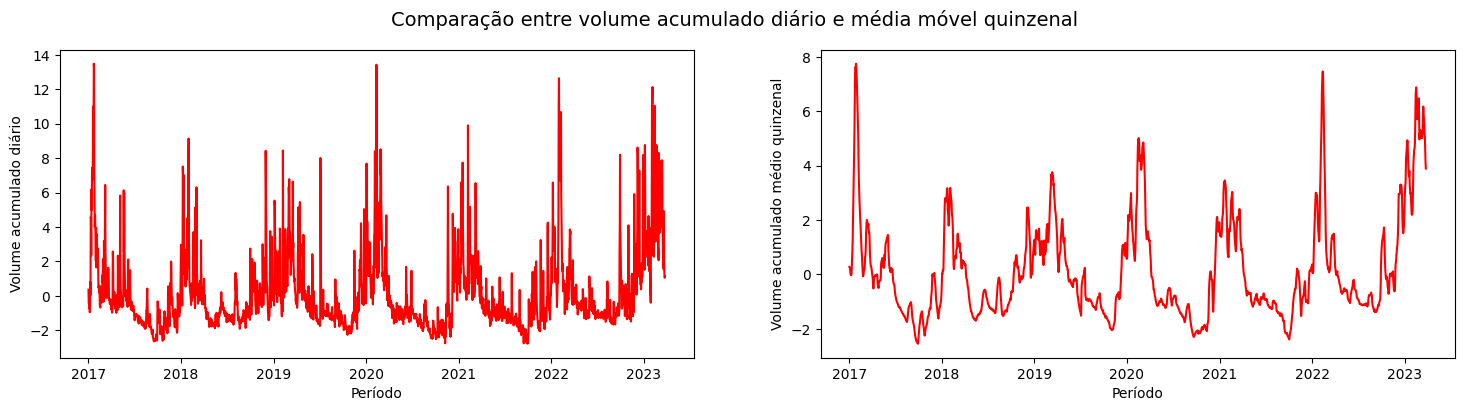

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(18,4))
fig.suptitle('Comparação entre volume acumulado diário e média móvel quinzenal',fontsize=14)

volume = sns.lineplot(ax=axes[0], x='data', y= 'diff', data=cantareira, color='red')
meanVolume = sns.lineplot(ax=axes[1], x='data', y= 'medMov.diff', data=cantareira, color='red')

#rotulos dos eixos
volume.set(xlabel='Período', ylabel='Volume acumulado diário')

meanVolume.set(xlabel='Período', ylabel='Volume acumulado médio quinzenal')

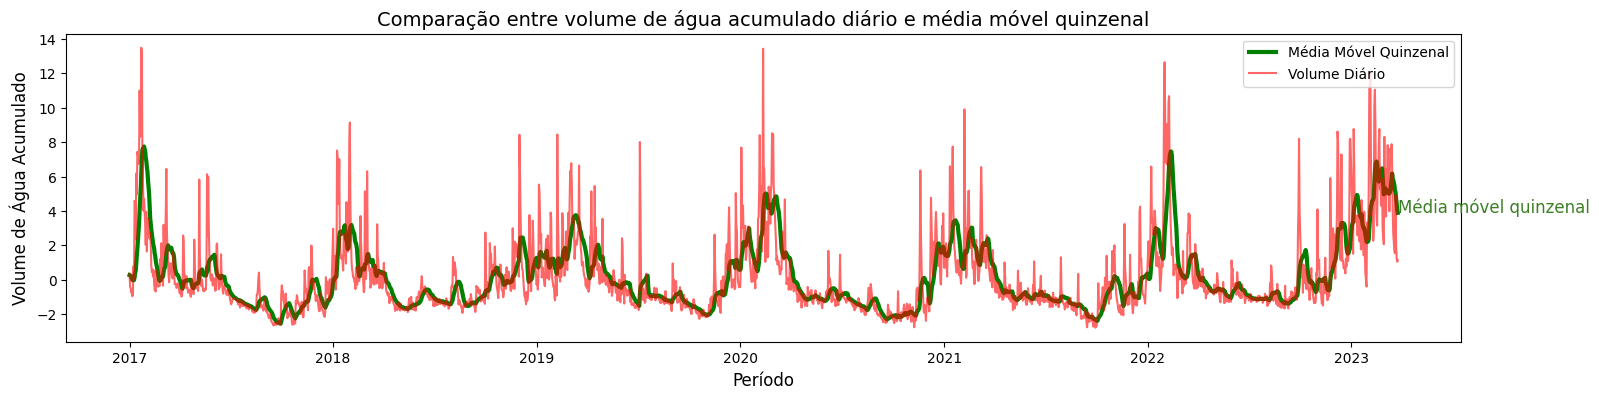

In [138]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre volume de água acumulado diário e média móvel quinzenal', loc='center', fontsize=14)

#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.diff'], linewidth=3, color='green')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.diff'].tail(1), 'Média móvel quinzenal', color='#3b8024', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['diff'], alpha=0.6, color='red')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Volume de Água Acumulado', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Volume Diário'])

###Tendências e sazonalidades da precipitação sobre o manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Pluviometria média quinzenal')]

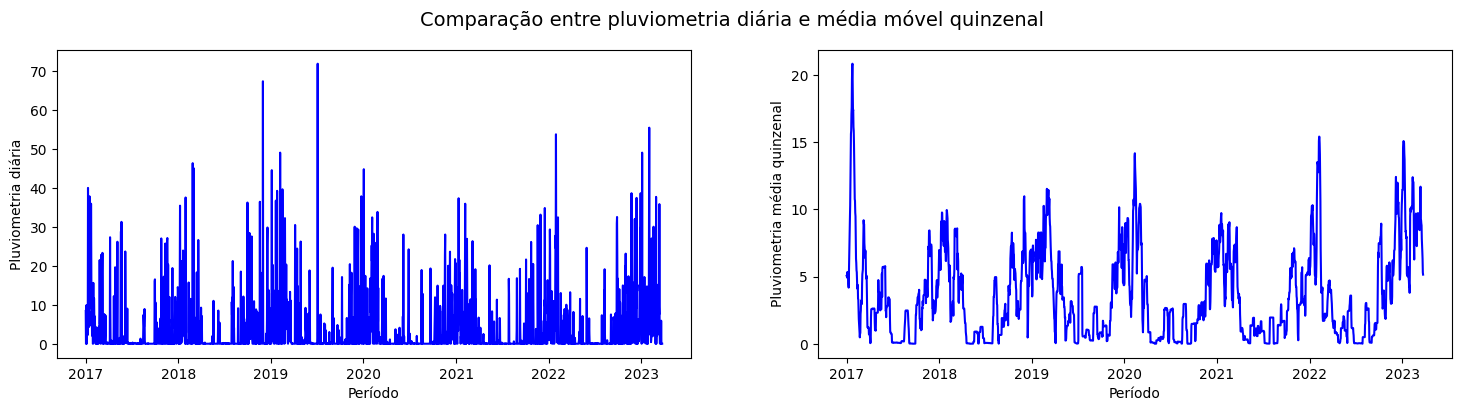

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
fig.suptitle('Comparação entre pluviometria diária e média móvel quinzenal',fontsize=14)
chuva = sns.lineplot(ax=axes[0], x='data', y= 'chuva', data=cantareira, color='blue')
meanChuva = sns.lineplot(ax=axes[1], x='data', y= 'medMov.chuva', data=cantareira, color='blue')

#eixos
chuva.set(xlabel='Período',
       ylabel='Pluviometria diária')

meanChuva.set(xlabel='Período',
       ylabel='Pluviometria média quinzenal')

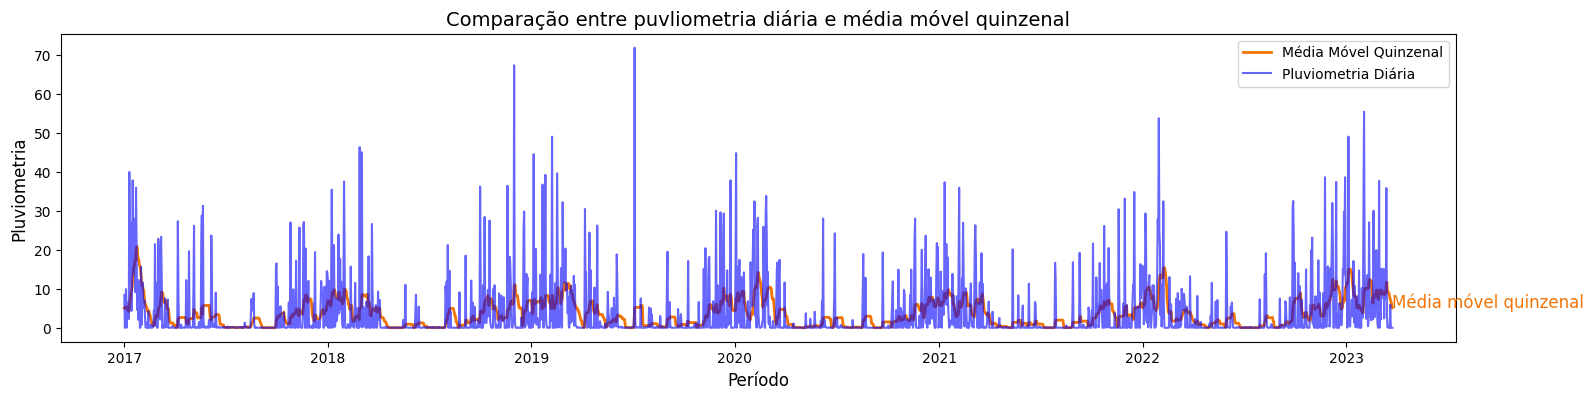

In [140]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre puvliometria diária e média móvel quinzenal', loc='center', fontsize=14)


#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.chuva'], linewidth=2, color='#f27405')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.chuva'].tail(1), 'Média móvel quinzenal', color='#f27405', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['chuva'], alpha=0.6, color='blue')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Pluviometria', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Pluviometria Diária'])

###Tendências e sazonalidades da temperatura em torno do manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Temperatura média quinzenal')]

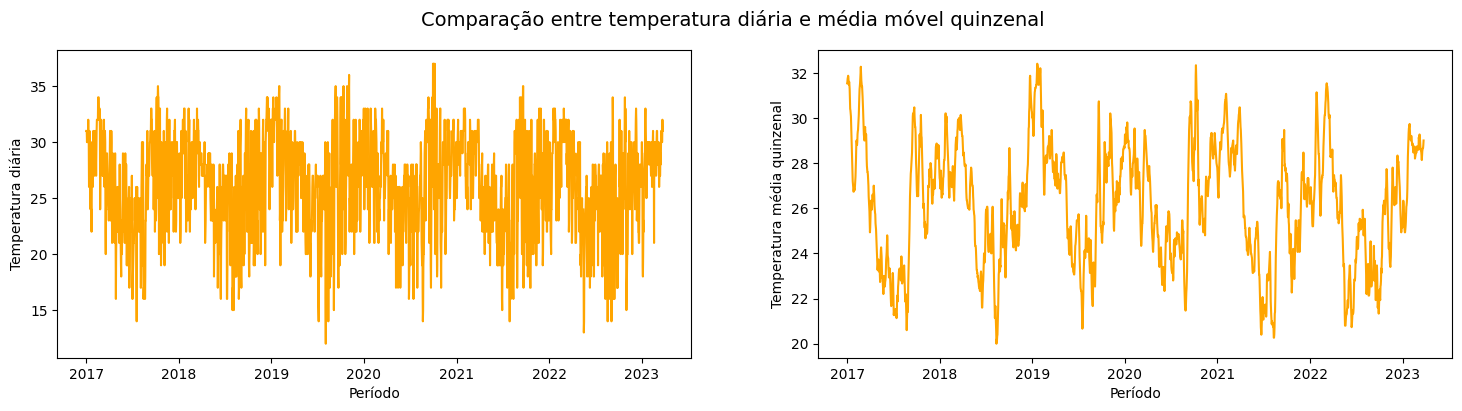

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
fig.suptitle('Comparação entre temperatura diária e média móvel quinzenal',fontsize=14)

temp = sns.lineplot(ax=axes[0], x='data', y= 'tempMax', data=cantareira, color='orange')
meantemp = sns.lineplot(ax=axes[1], x='data', y= 'medMov.temp', data=cantareira, color='orange')

#eixos
temp.set(xlabel='Período',
       ylabel='Temperatura diária')

meantemp.set(xlabel='Período',
       ylabel='Temperatura média quinzenal')

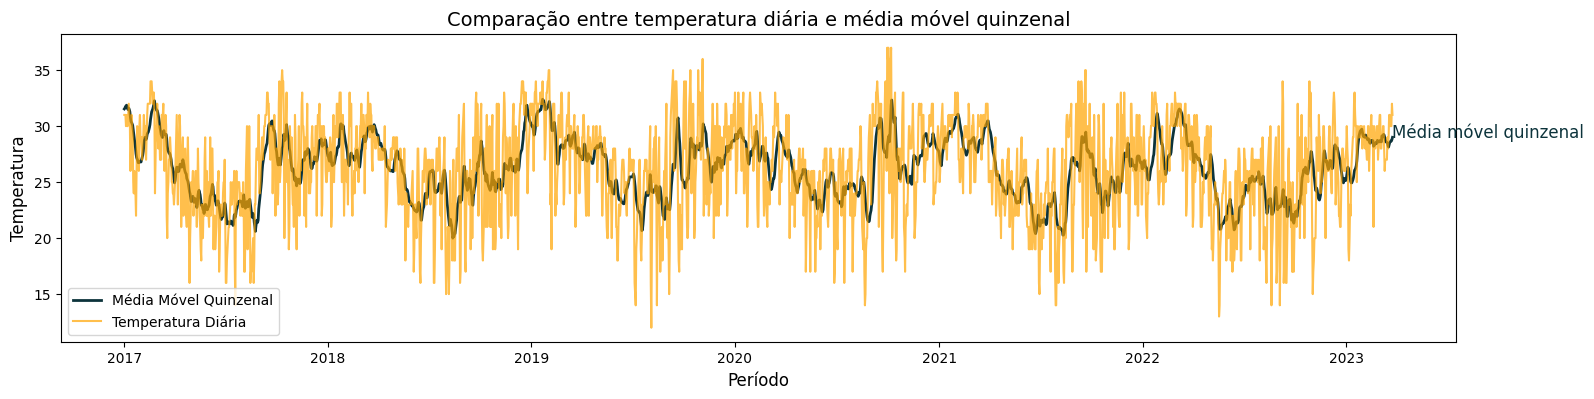

In [142]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre temperatura diária e média móvel quinzenal', loc='center', fontsize=14)

#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.temp'], linewidth=2, color='#0c333b')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.temp'].tail(1), 'Média móvel quinzenal', color='#0c333b', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['tempMax'], alpha=0.7, color='orange')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Temperatura', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Temperatura Diária'])

###Verificando relação entre as 3 variáveis

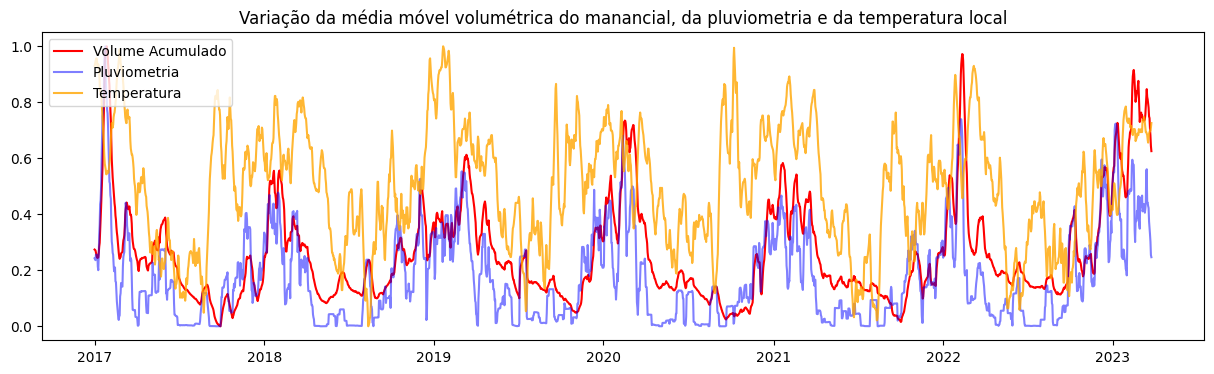

In [143]:
x = cantareira['data']
y1 = cantareira['medMov.diff']
y2 = cantareira['medMov.chuva']
y3 = cantareira['medMov.temp']

#normalizacao das variaves
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.values.reshape(-1,1))
y2_norm = scaler.fit_transform(y2.values.reshape(-1,1))
y3_norm = scaler.fit_transform(y3.values.reshape(-1,1))

#grafico normalizado
plt.figure(figsize=(15, 4))
plt.plot(x, y1_norm, label='medMov.diff', color ='red')  
plt.plot(x, y2_norm, label='medMov.chuva', alpha = 0.5, color='blue')  
plt.plot(x, y3_norm, label='medMov.temp', alpha = 0.8, color='orange')
plt.title("Variação da média móvel volumétrica do manancial, da pluviometria e da temperatura local", fontsize=12)
plt.legend(['Volume Acumulado', 'Pluviometria', 'Temperatura'], loc='upper left')

###Verificando correlação

In [144]:
cantareira.corr()

,id,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
id,1.000000,-0.436084,0.023241,-0.034368,0.109616,0.053402,0.127670,-0.075530
volume,-0.436084,1.000000,-0.078569,-0.021415,0.109879,-0.052309,0.238420,-0.004272
chuva,0.023241,-0.078569,1.000000,-0.039326,0.629645,0.401075,0.239434,0.200098
tempMax,-0.034368,-0.021415,-0.039326,1.000000,0.082657,0.212253,0.251538,0.551493
diff,0.109616,0.109879,0.629645,0.082657,1.000000,0.776628,0.748674,0.314976
medMov.chuva,0.053402,-0.052309,0.401075,0.212253,0.776628,1.000000,0.825212,0.379235
medMov.diff,0.127670,0.238420,0.239434,0.251538,0.748674,0.825212,1.000000,0.364062
medMov.temp,-0.075530,-0.004272,0.200098,0.551493,0.314976,0.379235,0.364062,1.000000


In [145]:
#funcao para padronizar o grafico de dispersao
def scatter_plot_df(x_var, y_var, title):
# definicao do grafico de barras
  fig = plt.figure(figsize = (8,4))

  sns.scatterplot(x=x_var, y=y_var, data = cantareira)

  # definicao dos nomes dos eixos e titulo
  plt.xlabel(x_var, fontsize = 12)
  plt.ylabel(y_var, fontsize = 12)

  plt.title(title, fontsize = 12)

  plt.show()

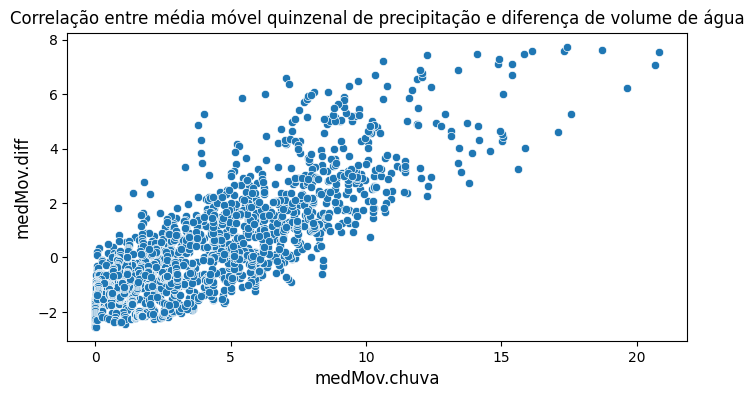

In [146]:
#dispersao entre medMov.chuva e diff
scatter_plot_df('medMov.chuva', 'medMov.diff', 'Correlação entre média móvel quinzenal de precipitação e diferença de volume de água')


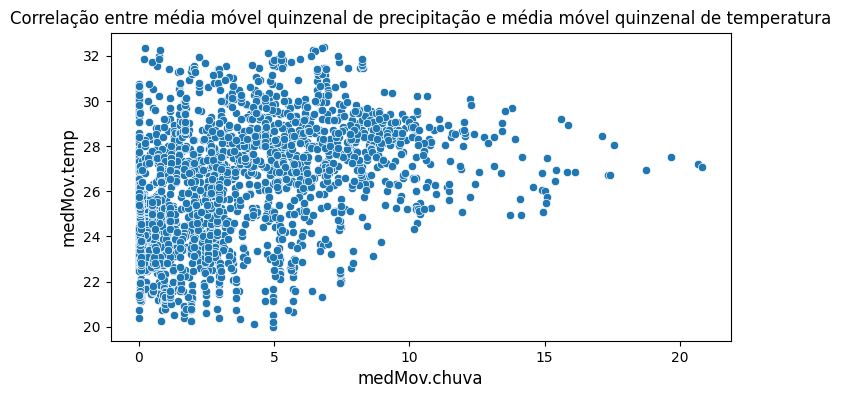

In [147]:
#dispersao entre medMov.temp e medMov.chuva
scatter_plot_df('medMov.chuva', 'medMov.temp', 'Correlação entre média móvel quinzenal de precipitação e média móvel quinzenal de temperatura')

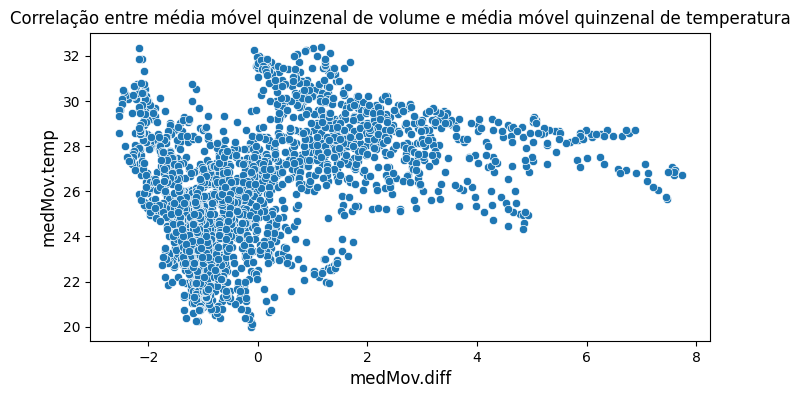

In [148]:
#dispersao entre medMov.temp e medMov.diff
scatter_plot_df('medMov.diff', 'medMov.temp', 'Correlação entre média móvel quinzenal de volume e média móvel quinzenal de temperatura')

###Verificando outliers

<Axes: >

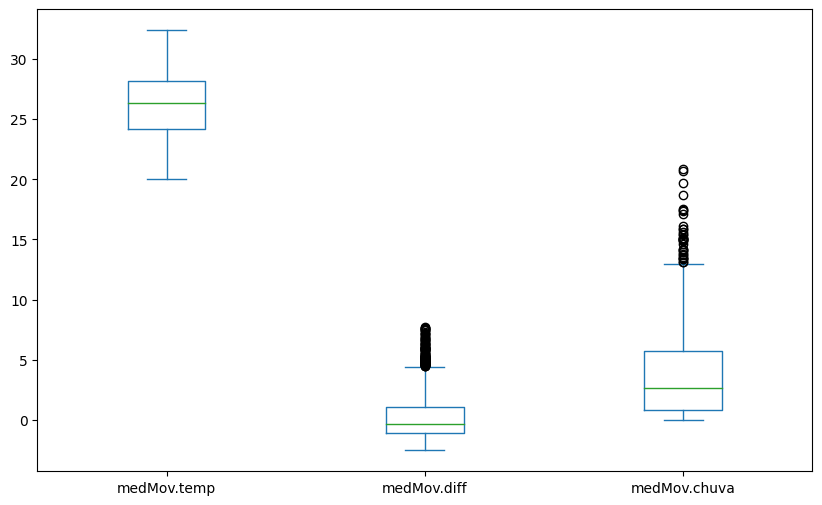

In [149]:
cantareira[['medMov.temp', 'medMov.diff', 'medMov.chuva']].plot.box(figsize=(10,6))

##Aprendizado de Máquina

###Importando bibliotecas e pacotes para ML

In [150]:
import numpy as np

import random

#regressao linear multipla
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #divisao da base de dados em conjuntos de treino e de teste
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn import metrics

import statsmodels.api as sm

#decision tree e random forest
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score, ShuffleSplit #tambem usado em cross-validation
from sklearn.ensemble import RandomForestRegressor

#GBM
from sklearn.ensemble import GradientBoostingRegressor

#SVM
from sklearn.svm import SVR

#redes neurais
from sklearn.neural_network import MLPRegressor

###Técnicas de Modelagem Tradicionais

Há duas variáveis preditoras, 'chuva' e 'tempMax', e uma variável dependente, que seria 'diff' (volume). Vamos usar suas médias móveis.

####Regressão Linear Múltipla

In [151]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] #variaveis independentes 
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#modelo de regressao linear multipla
regressao = LinearRegression()
regressao.fit(X_train, y_train)

y_pred = regressao.predict(X_test) #previsoes no conjunto de teste

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.0007820901678668
R²: 0.7016673803695953
R² adj - coeficiente de determinação ajustado: 0.7007899314883295


####Decision Tree

In [152]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] #variaveis independentes 
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo decision tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

#previsao
y_pred = regressor.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.4758206043610707
R²: 0.560058646803208
R² adj - coeficiente de determinação ajustado: 0.558764701646747


#####Verificação do decaimento de erro e necessidade de poda (melhor desempenho de previsão do modelo evitando overfiting).

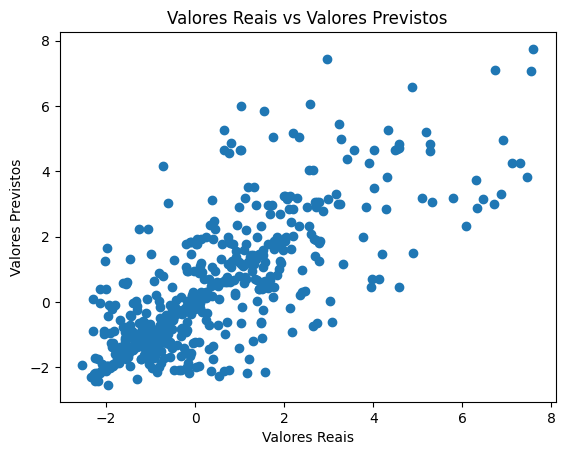

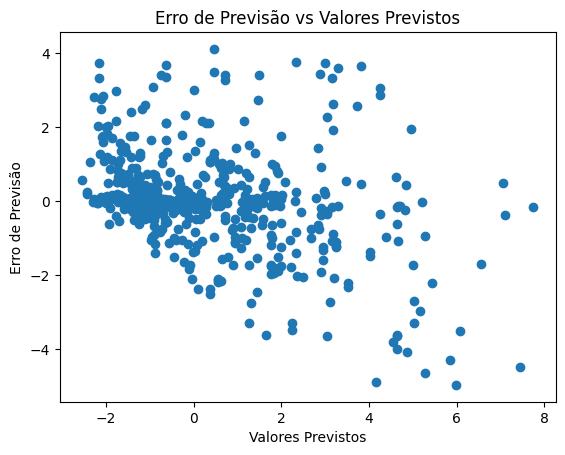

In [154]:
#VERIFICACAO DO DECAIMENTO DO ERRO
#calculo do erro de previsao
erro = y_test - y_pred

#grafico de dispersão dos valores reais vs os valores previstos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Valores Previstos')
plt.show()

#grafico de dispersao dos residuos vs os valores previstos
plt.scatter(y_pred, erro)
plt.xlabel('Valores Previstos')
plt.ylabel('Erro de Previsão')
plt.title('Erro de Previsão vs Valores Previstos')
plt.show()

In [162]:
#PODA POR REDUCAO DE ERRO MINIMO EM 0.02 (minimum error reduction - MER)
regressor = DecisionTreeRegressor(ccp_alpha=0.02)
regressor.fit(X_train, y_train)

#previsao
previsoes = regressor.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, previsoes)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, previsoes)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.0122479096035963
R²: 0.6982494255699678
R² adj - coeficiente de determinação ajustado: 0.6973619238804678


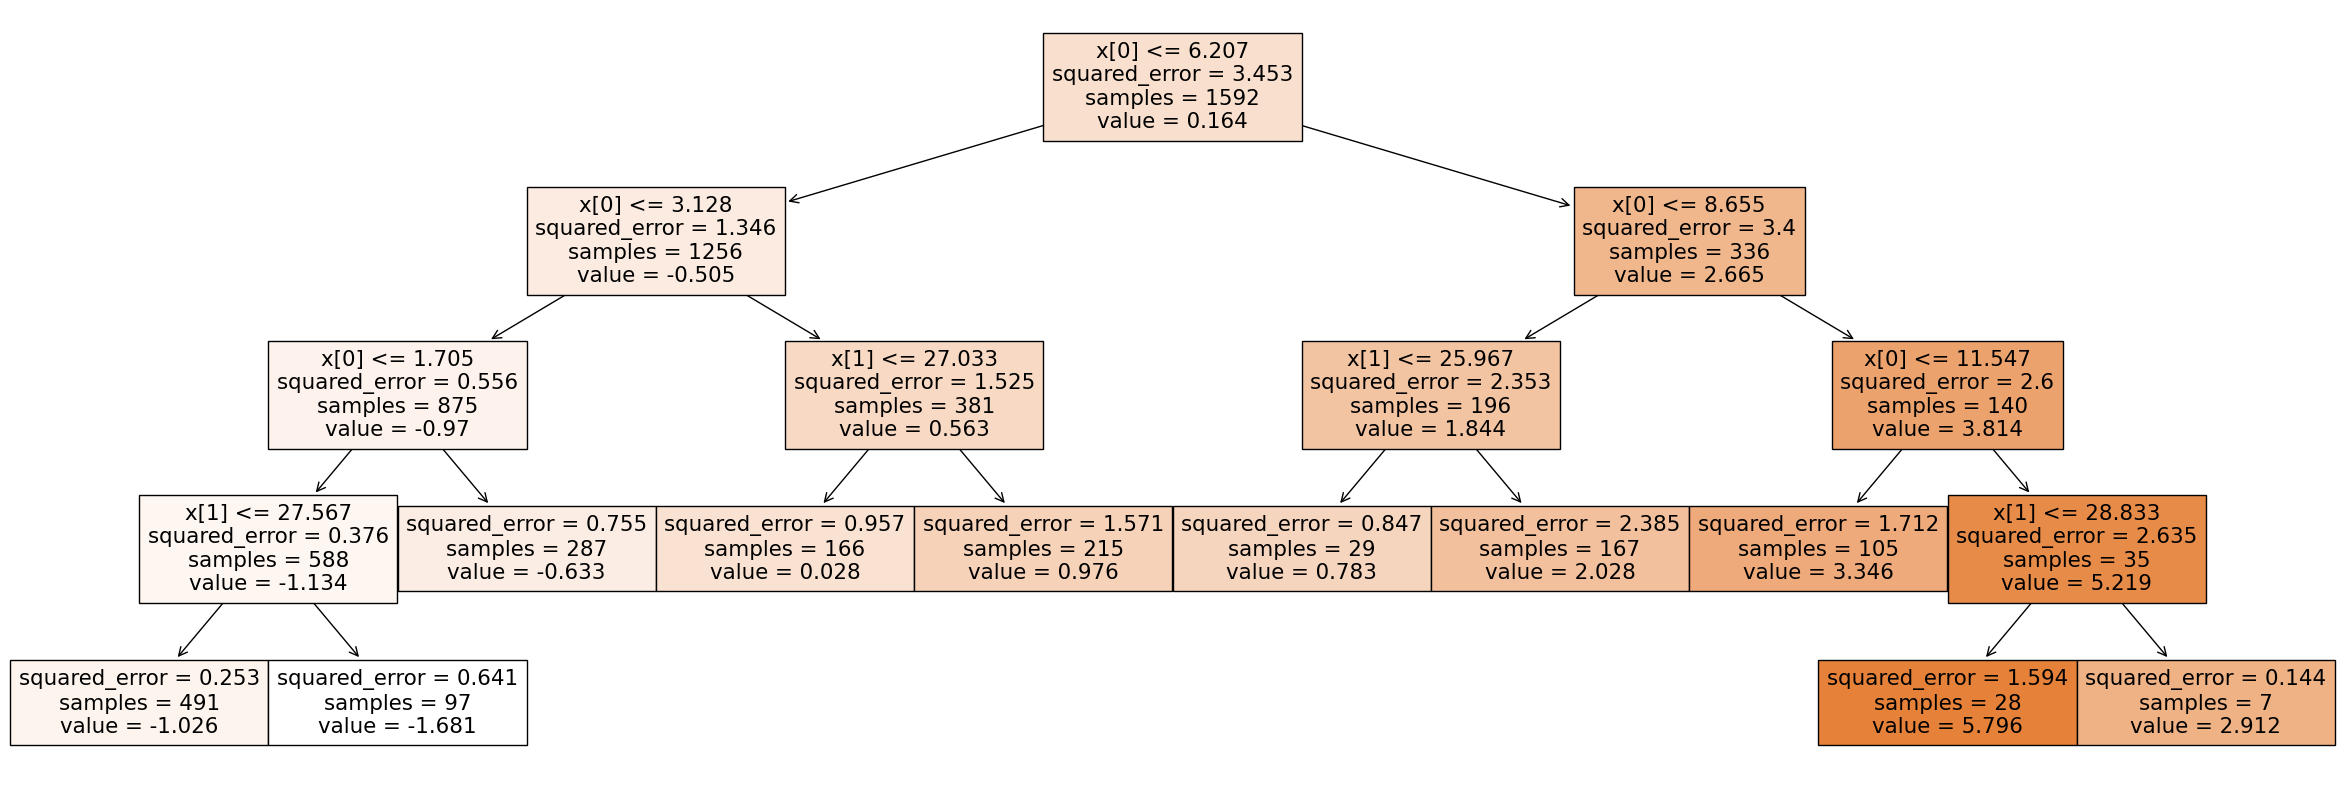

In [163]:
#arvore de decisao
plt.figure(figsize=(30, 10))
tree.plot_tree(regressor, filled=True)
plt.show()

###Técnicas de Modelagem Avançadas

####Random Forest

In [156]:
#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo de Random Forest
forest = RandomForestRegressor(n_estimators=80, max_features=2)
forest.fit(X_train, y_train)

#previsoes no conjunto de teste
y_pred = forest.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 0.8870072449067452
R²: 0.7355836024605611
R² adj - coeficiente de determinação ajustado: 0.7348059071736803


In [157]:
#feature importances
importancia = forest.feature_importances_

#novo dataframe que traz as variaveis e seu peso de importancia
importancia_df = pd.DataFrame({'Variável': X_train.columns, 'Importância': importancia})
importancia_df = importancia_df.sort_values('Importância', ascending=False) #ordenar por ordem decrescente

#variaveis mais importantes
print("Variáveis mais importantes no modelo de Random Forest:")
print(importancia_df.head())  

Variáveis mais importantes no modelo de Random Forest:
       Variável  Importância
0  medMov.chuva      0.83912
1   medMov.temp      0.16088


####Gradient Boosting Machine - GBM

In [158]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo GBM
gbm = GradientBoostingRegressor(n_estimators=80, max_features=2, learning_rate=0.1)

#treinando o modelo GBM
gbm.fit(X_train, y_train)

#previsao
y_pred = gbm.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 0.8380977315870762
R²: 0.7501635028972861
R² adj - coeficiente de determinação ajustado: 0.7494286896705133


####Suppor Vector Machine - SVM

In [159]:
#divisao em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo SVM
svm = SVR(kernel='linear', C=0.7)

#treinando o modelo
svm.fit(X_train, y_train)

#previsao
y_pred = svm.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.014715039680406
R²: 0.6975139753795472
R² adj - coeficiente de determinação ajustado: 0.6966243106012517


####Rede Neural MLP - Multi Layer Perceptron

In [160]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo MLPRegressor 
modeloNN = MLPRegressor(hidden_layer_sizes=(50, 50, 10), #3 camadas com 50, 50 e 10 neuronios 
                   activation='relu',
                   max_iter=700) #700 epocas
                   
#treinando o modelo
modeloNN.fit(X_train, y_train)

#previsao
y_pred = modeloNN.predict(X_test)

#metricas de desempenho
#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE - erro quadrático médio:", mse)

#r2
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

#r2 ajustado
n = len(X_test) #numero de observacoes
i = X_test.shape[1] #variaveis independentes
adjr2 = 1 - (1 - r2) * (n - 1) / (n - i - 1)
print("R² adj - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.0001782546574156
R²: 0.7018473834206377
R² adj - coeficiente de determinação ajustado: 0.7009704639601102


###Validação Cruzada - 10 folds e 30 seeds

In [164]:
#modelos
models = [
regressao, 
regressor, 
forest, 
gbm, 
svm, 
modeloNN
]

#funcao de validacao cruzada com 10 folds e 30 seeds
for model in models:
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1)
    print("Modelo:", type(model).__name__)
    print("Média do R²:", scores.mean())
    print("Mean Negative MSE:", -scores.mean())
    print("")

Modelo: LinearRegression
Média do R²: 0.3302546245207782
Mean Negative MSE: -0.3302546245207782

Modelo: DecisionTreeRegressor
Média do R²: 0.3228452310484268
Mean Negative MSE: -0.3228452310484268

Modelo: RandomForestRegressor
Média do R²: 0.07519284032116659
Mean Negative MSE: -0.07519284032116659

Modelo: GradientBoostingRegressor
Média do R²: 0.3767057608929073
Mean Negative MSE: -0.3767057608929073

Modelo: SVR
Média do R²: 0.3371606039745854
Mean Negative MSE: -0.3371606039745854

Modelo: MLPRegressor
Média do R²: 0.35360639263006843
Mean Negative MSE: -0.35360639263006843



*   Regressão Linear Múltipla: A média do R² é baixa (0.33) e o erro médio é relativamente alto (-0.33). Isso indica um desempenho limitado na modelagem da série temporal.

*   Árvore de Decisão: A média do R² é ligeiramente mais baixa (0.32) e o erro médio é negativo (-0.32), indicando uma performance semelhante à Regressão Linear Múltipla.

*   Random Forest: A média do R² é muito baixa (0.07) e o erro médio é negativo (-0.07). Isso sugere que o modelo não está se ajustando bem aos padrões da série temporal.

*   Gradient Boosting: A média do R² é mais alta (0.37) e o erro médio é negativo (-0.37). Isso indica que o modelo tem um desempenho melhor que os anteriores, mas não é completamente satisfatório.

*   Máquina de Vetor de Suporte (SVM): A média do R² é semelhante à Árvore de Decisão (0.33) e o erro médio é negativo (-0.33). O desempenho é comparável aos modelos anteriores.

*   Rede Neural MLP: A média do R² é mais baixa (0.35) e o erro médio é negativo (-0.35). O desempenho é o mais fraco entre os modelos avaliados.

`O Gradient Boosting parece ter o melhor desempenho geral, com uma média do R² mais alta e um erro médio negativo mais baixo em comparação aos outros modelos.`